# CPSC380: Program 4 - Pandas Basics

There are three parts in this programming assignment: 
- Part A (four tasks): each task is worth 1 point
- Part B (eight tasks): each task is worth 1 point
- Part C (one task): it is worth 2 points

### Submission Instruction:
- Electronic submission: upload this jupyter notebook on d2l
- In-class demo:
 - Run this jupyter notebook on your laptop.
 - Answer the questions if requested.

## Part A (Questions 1-4)

The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('olympics.csv', index_col=0, skiprows=1)

# The first column is split into country with ID
names_ids = df.index.str.split('\s\(') # split the index by '('
df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

# rearrange column order
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]  

print (df.columns)
df.head()

After data cleaning process, the dataframe has coutryname as index, and has 16 columns. 

The columns are organized as :
 - Column 1: 'ID': country code 
 - Column 2-6: Summer game
   - 'S_Games': the `#` of Summer games participated 
   - 'S_Gold', 'S_Silver', 'S_Bronze', 'S_Total': the `#` of medals gold, silver, bronze, and total obtained in summer games
 - Column 7-11: Winter game
   - 'W_Games': the `#` of Winter games participated 
   - 'W_Gold', 'W_Silver', 'W_Bronze', 'W_Total': the `#` of medals gold, silver, bronze, and total obtained in winter games
 - Column 12-16: combined games  
   - 'Total_Games': the `#` of total games participated 
   - 'Total_Gold', 'Total_Silver', 'Total_Bronze', 'Combined_Total': the `#` of medals gold, silver, bronze, and total obtained in (summer + winter) games

#### Question 1

return the row with index of `United States` from dataframe `df`.

In [ ]:
def question_one():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    
    return df.loc['United States']

    
    ### END CODE HERE ###
    
# do not change the code below  
question_one()

ID                 USA
S_Games             26
S_Gold             976
S_Silver           757
S_Bronze           666
S_Total           2399
W_Games             22
W_Gold              96
W_Silver           102
W_Bronze            84
W_Total            282
Total_Games         48
Total_Gold        1072
Total_Silver       859
Total_Bronze       750
Combined_Total    2681
Name: United States, dtype: object

**Expected Output**: 

#### Question 2
Which country has won the most gold medals in summer games (Hint: Use column `S_Gold`)?

In [ ]:
def question_two():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    
    return df['S_Gold'].idxmax()
    
    ### END CODE HERE ###
    
# do not change the code below  
question_two()

'United States'

**Expected Output**: 
<table >
    <tr> 
        <td> 'United States'</td> 
    </tr>
</table> 

#### Question 3
Which country had the biggest difference between their summer and winter gold medal counts?

In [ ]:
def question_three():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code

    return (df['S_Gold'] - df['W_Gold']).idxmax()
    
    ### END CODE HERE ###
# do not change the code below  
question_three()

'United States'

**Expected Output**: 
<table >
    <tr> 
        <td> 'United States'</td> 
    </tr>
</table> 

#### Question 4
Creates a Series called "Total_Points" which is a weighted value where each gold medal (`Total_Gold`) counts for 3 points, silver medals (`Total_Silver`) for 2 points, and bronze medals (`Total_Bronze`) for 1 point.

In [ ]:
def question_four():
   
    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    df['Total_Points'] = df['Total_Gold'] * 3 + df['Total_Silver'] * 2 + df['Total_Bronze']
    ### END CODE HERE ###
    return df['Total_Points'].sort_values().tail()
    
# do not change the code below  
question_four()

France           1500
Germany          1546
Great Britain    1574
Soviet Union     2526
United States    5684
Name: Total_Points, dtype: int64

**Expected Output:**

## Part B: (Questions 5-12)
We will be using census data from the [United States Census Bureau](http://www.census.gov). Counties are political and geographic subdivisions of states in the United States. This dataset contains population data for counties and states in the US from 2010 to 2015. [See this document](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf) for a description of the variable names.

In [ ]:
census_df = pd.read_csv('census.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


#### Question 5

Split the `census_df` into two dataframes:
  - `state_census_df`: containing state level records (i.e `SUMLEV` == 40)
  - `city_census_df`: containing city level records (i.e `SUMLEV` == 50)
  
Return these two data frames.

In [ ]:
def question_five():

    ### START CODE HERE ### (≈ 2 line of code)
    # replace None with your code
    state_census_df = census_df[census_df['SUMLEV'] == 40]
    city_census_df = census_df[census_df['SUMLEV'] == 50]
    
    ### END CODE HERE ###
    return state_census_df, city_census_df
    
# do not change the code below  
state_census_df, city_census_df = question_five()
print(len(state_census_df), len(city_census_df))

51 3142


**Expected Output**: 
<table >
    <tr> 
        <td>51 3142</td> 
    </tr>
</table> 

#### Question 6
Find the total population based on 2010's census.

Hint:
 - you should state_census_df saved from question 5 
 - use the column of `CENSUS2010POP` to sum up.

In [ ]:
def question_six():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    return state_census_df['CENSUS2010POP'].sum()
    
    ### END CODE HERE ###
    
# do not change the code below  
question_six()

308745538

**Expected Output**: 
<table >
    <tr> 
        <td> 308745538</td> 
    </tr>
</table> 

#### Question 7
 - Creates a Series called `STATEPOPCHANGE` that is defined as the percentage change between the column of  `POPESTIMATE2015` and `POPESTIMATE2010` from `state_census_df`. This series object should be added into  `state_census_df`. 
 - Select the rows that have column value `STATEPOPCHANGE` > 10.0
 - return dataframe that only shows the columns of ['STNAME', 'POPESTIMATE2010','POPESTIMATE2015', 'STATEPOPCHANGE']


In [ ]:
#used to suppress the SettingWithCopyWarning, which occurs when you perform 
#chained assignments on a DataFrame. This line is not necessary for the Question 12 
# function, as there is no chained assignment taking place in the code.
pd.options.mode.chained_assignment = None  # default='warn'
def question_seven():
    #pd.options.mode.chained_assignment = None  # default='warn'
    ### START CODE HERE ### (≈ 3-5 lines of code)
    # Calculate the percentage change between POPESTIMATE2015 and POPESTIMATE2010
    state_census_df['STATEPOPCHANGE'] = ((state_census_df['POPESTIMATE2015'] - state_census_df['POPESTIMATE2010']) / state_census_df['POPESTIMATE2010']) * 100

    # Select rows with STATEPOPCHANGE greater than 10.0
    result = state_census_df[state_census_df['STATEPOPCHANGE'] > 10.0]

    # Create a new DataFrame with only the required columns
    final_result = result[['STNAME', 'POPESTIMATE2010', 'POPESTIMATE2015', 'STATEPOPCHANGE']]

    # Set index to the state names (STNAME) and drop the original index
    final_result = final_result.set_index('STNAME', drop=True)

    return final_result    
    ### END CODE HERE ###
    
    
# do not change the code below  
question_seven()

,POPESTIMATE2010,POPESTIMATE2015,STATEPOPCHANGE
STNAME,,,
District of Columbia,605126,672228,11.088930
North Dakota,674530,756927,12.215469


**Expected Output**: 

#### Question 8

How many **unique** county names in USA? (Hint: Use dataframe `city_census_df`)?

In [ ]:
def question_eight():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    return city_census_df['CTYNAME'].nunique()

    
    ### END CODE HERE ###
    
# do not change the code below  
question_eight()

1877

**Expected Output**: 
<table >
    <tr> 
        <td>1877</td> 
    </tr>
</table> 

**Note:** Questions 9-12 are related. That means, you must first your solution for Q9, then Q10, Q11 and finally Q12. Also use dataframe `city_census_df`.

#### Question 9

Find the most common county name in USA (i.e., having the highest number of counts in column `CTYNAME`).

In [ ]:
def question_nine():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    #  = city_census_df['CTYNAME'].value_counts().idxmax()
    most_common_city_name = city_census_df['CTYNAME'].mode().iloc[0]
    
    ### END CODE HERE ###
    return most_common_city_name

# do not change the code below  
most_common_city_name = question_nine()
most_common_city_name

'Washington County'

**Expected Output**: 
<table >
    <tr> 
        <td>'Washington County'</td> 
    </tr>
</table> 

#### Question 10

 - Step1: Find all rows (in dataframe `city_census_df`) that have the most common county name found in question 9
 - Step2: create a new dataframe `washington_df` that stores all the rows selected from Step1, and uses the columns of 'REGION','STNAME','CTYNAME'

In [ ]:
def question_ten():

    ### START CODE HERE ### (≈ 2-3 lines of code)
    washington_df = city_census_df[city_census_df['CTYNAME'] == city_census_df['CTYNAME'].value_counts().idxmax()][['REGION', 'STNAME', 'CTYNAME']]
#return top 5 rows
    print("Test: (top 5) \n" , washington_df.head(5))
    # returns entire dataframe
    ### END CODE HERE ###
    return washington_df
    
# do not change the code below  
washington_df = question_ten()
washington_df

Test: (top 5) 
#      REGION    STNAME            CTYNAME
65        3   Alabama  Washington County
186       3  Arkansas  Washington County
311       4  Colorado  Washington County
396       3   Florida  Washington County
547       3   Georgia  Washington County


,REGION,STNAME,CTYNAME
65,3,Alabama,Washington County
186,3,Arkansas,Washington County
311,4,Colorado,Washington County
396,3,Florida,Washington County
547,3,Georgia,Washington County
607,4,Idaho,Washington County
703,2,Illinois,Washington County
799,2,Indiana,Washington County
896,2,Iowa,Washington County
1005,2,Kansas,Washington County


**Expected top-five lines**: 

#### Question 11

From the dataframe `washington_df`, rename the `REGION` column values as follows:  1: "Northeast", 2: "Midwest", 3:"South", 4:"West" 

In [ ]:
def question_eleven():

    ### START CODE HERE ### (≈ 1-2 lines of code)
        # Replace REGION column values with the new region names
    regions = {1:"NorthEast", 2:"Midwest", 3:"South", 4:"West"}
    # change numbers to names for question 12
    washington_df['REGION'] = washington_df['REGION'].replace(regions)
    #print("Test: (top 5) \n" , washington_df.head(5))
    ### END CODE HERE ###
    return  washington_df

# do not change the code below  
washington_df = question_eleven()
washington_df

,REGION,STNAME,CTYNAME
65,South,Alabama,Washington County
186,South,Arkansas,Washington County
311,West,Colorado,Washington County
396,South,Florida,Washington County
547,South,Georgia,Washington County
607,West,Idaho,Washington County
703,Midwest,Illinois,Washington County
799,Midwest,Indiana,Washington County
896,Midwest,Iowa,Washington County
1005,Midwest,Kansas,Washington County


**Expected top-five lines**: 

#### Question 12

From the dataframe washington_df, return the value counts for each `REGION`. 

In [ ]:
washington_df['REGION'].value_counts()

def question_twelve():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    return washington_df['REGION'].value_counts()

    
    ### END CODE HERE ###
    
# do not change the code below  
question_twelve()

South        12
Midwest       9
NorthEast     5
West          4
Name: REGION, dtype: int64

**Expected output**: 

## Part C: Flower Classfication: Data Loading

**In this task**, you will need to load your created CSV file: `flower_recognition_train.csv` and `flower_recognition_test.csv`. 


You may recall the format of your csv file should look like this: (`flower_recognition_train.csv`)

    `,FileName,Label,ClassName
    0,/home/dche/Course/CPSC380/flowers/tulip/tulip_000849.png,4,tulip
    1,/home/dche/Course/CPSC380/flowers/tulip/tulip_000587.png,4,tulip
    2,/home/dche/Course/CPSC380/flowers/tulip/tulip_000302.png,4,tulip
    ...
    923,/home/dche/Course/CPSC380/flowers/tulip/tulip_000798.png,4,tulip
    924,/home/dche/Course/CPSC380/flowers/daisy/daisy_000632.png,0,daisy
    925,/home/dche/Course/CPSC380/flowers/daisy/daisy_000267.png,0,daisy
    926,/home/dche/Course/CPSC380/flowers/daisy/daisy_000381.png,0,daisy
    ...
    4015,/home/dche/Course/CPSC380/flowers/rose/rose_000704.png,2,rose
    4016,/home/dche/Course/CPSC380/flowers/rose/rose_000683.png,2,rose
    
You will need to extract FileName column and label column, save them into a numpy array for each column, and return them for image display.


In [ ]:
import os

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

import cv2

In [ ]:
# load dataset from a csv file 
# return a list of imageFileNames, a list of labels
def load_samples(csv_file):
    
    ### START CODE HERE ### (≈ 1 line of code)
        # Read the CSV file using pandas
    data = pd.read_csv(csv_file)
    imageFiles = np.array(data['FileName'])
    labels = np.array(data['Label'])
    ### END CODE HERE ###
    
    # do not change the code below 
    return imageFiles, labels

In [ ]:
# important: you need to make sure get the following csv from your previous program
#            your flower dataset should be accessed if loading images based on your
#            csv file path speficification

# Use flower_recognition_train.csv as an example
data_path = 'flower_recognition_train.csv'
imageFiles, labels = load_samples(data_path)

In [ ]:
print(imageFiles[:2], labels[:2])

['D:\\GitHub\\DataScienceTermProject\\Program3\\flowers\\flowers\\daisy\\daisy_000582.png'
 'D:\\GitHub\\DataScienceTermProject\\Program3\\flowers\\flowers\\daisy\\daisy_000377.png'] [0 0]


### Important: You should not change anything below

In [ ]:
# read image file and convert it to pixel value
def read_image(imageFileName, resize=224):

    img =  cv2.imread(imageFileName)
                
    # apply any kind of preprocessing
    img = cv2.resize(img,(resize,resize))

    return img

In [ ]:
def plot_images(imageFiles, labels):

    number_images=len(imageFiles)
    fig = plt.figure(1,figsize=(10,10))
    for i in range(number_images):
        plt.subplot(number_images//2, number_images//2,i+1)
        plt.tight_layout()

        img = read_image(imageFiles[i])
        #img = img[:,:,::-1] # converting BGR to RGB
        plt.imshow(img[:,:,::-1], interpolation='none')
        plt.title("class_label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])
    return plt

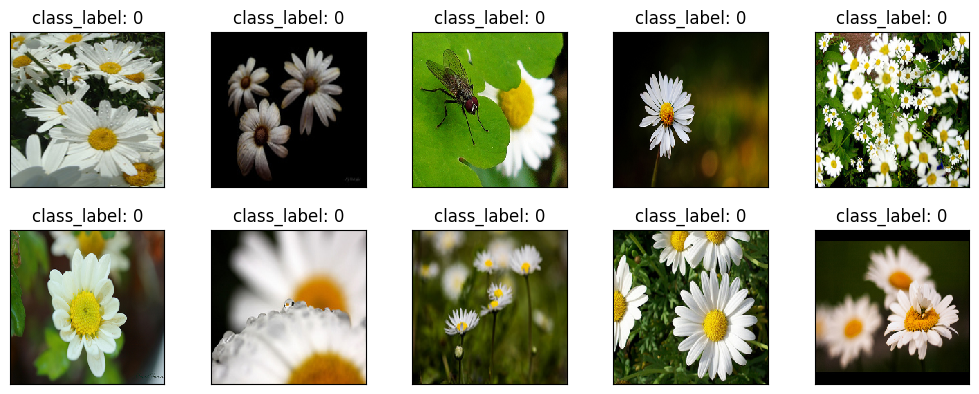

In [ ]:
plt = plot_images(imageFiles[:10], labels[:10])

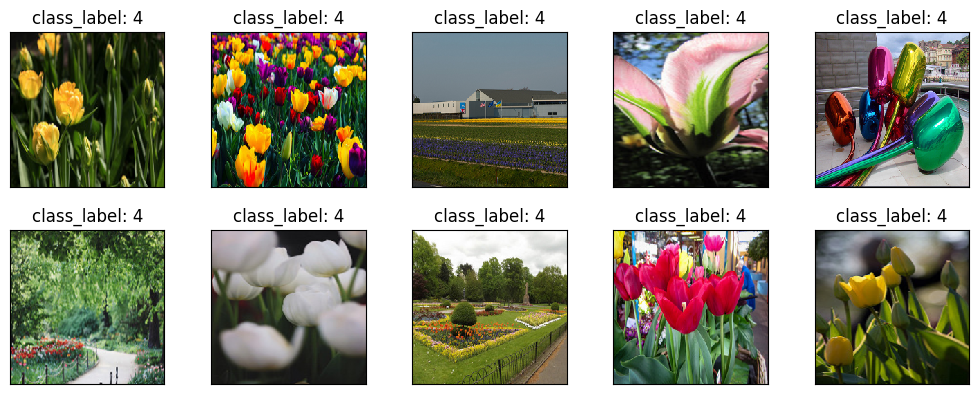

In [ ]:
plt = plot_images(imageFiles[-10:], labels[-10:])